## Derivation of propagation speed of a spike propagating through a 1D chain of excitatory neurons coupled to recurrent inhibition

### Overview
The aim is to solve exactly a simple network in which excitatory cells are coupled in a 1-D manner and a single inhibitory cell is recurrently coupled to all excitatory cells.

### Single cell model

Consider a 1-D chain of bursting neurons coupled to a single inhibitory cell. The governing equations for the dynamics of each individual cell are:

\begin{equation*}
\dot{V}(t) = -\frac{V(t)}{\tau_m} + \frac{I(t)}{C}
\label{eq:single_membrane} \tag{1}
\end{equation*}

where $V(t)$ is the membrane potential, $\tau_m$ is the membrane time constant, $I(t)$ is the external current, and $C$ is the membrane capacitance.

If neuron 1 is connected to neuron 2 by directional weight $w$, then the spike from 1 elicits current $I_{s}(t)$ in cell 2, where $I_{s}$ is given by:

\begin{equation*}
I_{s}(t) = w \frac{t}{\tau_{\alpha}} e^{-t/\tau_{\alpha}} \Theta (t)
\label{eq:single_spike_current} \tag{2}
\end{equation*}

where $\Theta$ is the Heaviside function.

### Constant current approximation

If neuron 1 fires at a consistent rate $f$, such that $1/f$ is proportional to or less the $\tau_{\alpha}$, the current in cell 2 will saturate at:

$$ I_{const} = w \tau_{\alpha} f $$

This is the constant current approximation. Further, the following equation is a reasonable approximation of the current as the cell is driven:

\begin{equation*}
I_{rise}(t) = w \tau_{\alpha} f \left(1 - e^{-t/\tau_{\alpha}}\right)
\label{eq:current_approx}
\end{equation*}

Therefore, a cell receiving $n$ spikes at frequency $f$ with the first spike occuring at $t=0$ will have the following current input:

\begin{equation*}
I(t) = \begin{cases} 
    w \tau_{\alpha} f \left(1 - e^{-t / \tau_{\alpha}}\right) & t \leq \frac{n}{f} \\
    w \tau_{\alpha} f \left(1 - e^{-n / (f \tau_{\alpha})}\right) e^{-(t - \frac{n}{f}) / \tau_{\alpha}} & t \gt \frac{n}{f} \\
\end{cases}
\label{eq:current_approx} \tag{3}
\end{equation*}

### Calculating number of output spikes

Typically, the excusion of the membrane potential due to an input current $I(t)$ is:

$$
V(t) = \frac{1}{C} \int_{0}^{t} I(t') e^{(t-t')/\tau_{m}} dt'
$$

until $V(t) = V_{th}$, at which point the voltage is reset.

For a first order solution, we take the membrane constant $\tau_m$ to be large compared to $t - t'$, allowing us to approximate $V(t)$ as:

$$
V(t) \approx \frac{1}{C} \int_{0}^{t} I(t') dt'
$$

The ouput spikes due to input current $I(t)$, then, is:

$$
n' = \frac{1}{C V_{th}} \int_0^{\inf} I(t') dt'
$$

Here, the integral is written with upper bound $\inf$, but it is understood the approximation only holds if $I(t)$ is non-zero for a duration comparable to $\tau_m$ or less.

The number of output spikes due to $n$ input spikes at frequency $f$ is then:

$$
n' = \frac{1}{C V_{th}} \int_0^{\inf} I(t') dt'
$$

$$
= \frac{w \tau_{\alpha} f}{C V_{th}} \left[\int_0^{n/f} \left(1 - e^{-t / \tau_{\alpha}}\right)dt + \int_{n/f}^{\inf} \left(1 - e^{-n / (f \tau_{\alpha})}\right) e^{-(t - \frac{n}{f}) / \tau_{\alpha}} dt \right]
$$

$$
= \frac{w \tau_{\alpha} f}{C V_{th}} \left[ \left(\frac{n}{f} + \tau_{\alpha} (e^{n/(f \tau_{\alpha})} - 1) \right) + \tau_{\alpha}\left(1 - e^{-n / (f \tau_{\alpha})}\right) \right]
$$

\begin{equation*}
n' = \frac{w \tau_{\alpha} n}{C V_{th}}
\label{eq:input_output_spike_relation} \tag{4}
\end{equation*}

This calculation, of course, is limited in that it does not calculate exactly when these spikes occur. For the time being, we will assume the spikes emitted from a drive cell always occur at frequency $f_0$.

### Considering a 1D chain without inhibition

From equation (4), we see that a chain without inhibition only supports one fixed points in its dynamics. This occurs when:

\begin{equation*}
\frac{w \tau_{\alpha}}{C V_{th}} = 1
\label{eq:input_output_spike_relation}
\end{equation*}

Otherwise, the number of spikes will continue to grow or decrease as the excitation propagates along the chain.

### Adding inhibition

We now consider an inhibitory cell that receives afferents from all excitatory cells organized in a 1D chain. The average spiking activity this cell receives is:

$$
f_{e->i} = \frac{n}{t^*},
$$

where $n$ is the number of spikes per excitatory cell and $t^*$ is the average latency in the first spike time of two adjacent neurons in the chain. 

Invoking the constant current approximation, the average current recieved is:

$$
I_{e->i} = w_{e->i} \tau_{\alpha} f_{e->i}
$$

$$
= \frac{w_{e->i} \tau_{\alpha} n}{t^*}
$$

To calculate the average firing rate of the I cell, we begin with the equation for the voltage of a current-coupled neuron driven by a constant current:

$$ V(t) = \frac{1}{C_i}\int_{0}^{t} e^{-(t-t')/\tau_m} I_{e->i} dt'$$

\begin{equation*}
V_{i}^{th} = \frac{I_{e->i}}{C_i} \tau_m \left(1 - e^{-t/\tau_m}\right)
\label{eq:steady_state_voltage} \tag{5}
\end{equation*}

This implies the average time to fire is:

$$ t^*_i = -\tau_m \log \left( 1 - \frac{V_{i}^{th} C_i}{I_{e->i} \tau_m} \right) $$

This implies firing rate $f_i$:

$$ f_i = \frac{-1}{\tau_m \log \left( 1 - \frac{V_{i}^{th} C_i t^*}{w_{e->i} \tau_{\alpha} n \tau_m} \right)} $$

This may be approximated effectively as:

\begin{equation*}
f_i = \begin{cases}
    0 & x \leq 1 \\
    \frac{1}{\tau_m log(2)} + \frac{1}{2 \tau_m log^2(2)} \left(x-2\right) & x \gt 1 \\
\end{cases}
\label{eq:current_approx} \tag{6}
\end{equation*}

where

$$
x = \frac{w_{e->i} \tau_{\alpha} n \tau_m}{V_{i}^{th} C_i t^*}.
$$

### Calculation of inter-layer first spike latency and spikes per layer

We assume a given excitatory cell in our 1D chain has been driven a long time by spiking activity from the inhibitory cell. Extrapolating from equation (5), the steady-state voltage of an excitatory cell will be:

$$
V_e = V_{e, 0} + \frac{I_{i->e} \tau_m}{C} = V_{e, 0} + \frac{w_{i->e} f_i \tau_{\alpha} \tau_m}{C}
$$

Here, it is assumed that $w_{i->e}$ is negative so that it lowers the steady-state voltage of the cell.

When an excitatory cell is driven by a spike train of $n$ spikes at frequency $f$, we can calculate the time to first spike of the driven cell (relative to the start of the incoming spike train) by examining the time-to-threshold of the driven cell:

\begin{equation*}
V(t^*) = V_{e}^{th} = V_{e, 0} + \frac{w_{i->e} f_i \tau_{\alpha} \tau_m}{C} + \frac{1}{C}  \int_0^{t^*} I_{e->e}(t') dt'
\label{eq:current_approx} \tag{7}
\end{equation*}

We now assume $t^* < \frac{n}{f}$, permitting us to use the first case of equation (3). We further set $V_{e, 0} = 0$. Equation (7) then becomes:

\begin{equation*}
V_{e}^{th} = \frac{w_{i->e} f_i \tau_{\alpha} \tau_m }{C} + \frac{w_{e->e} \tau_{\alpha} f}{C} \int_0^{t^*} (1 - e^{-t' / \tau_{\alpha}}) dt'
\label{eq:current_approx}
\end{equation*}

\begin{equation*}
V_{e}^{th} = \frac{w_{i->e} f_i \tau_{\alpha} \tau_m }{C} + \frac{w_{e->e} \tau_{\alpha} f}{C}  \left(t^* - \tau_{\alpha} (e^{-t^* / \tau_{\alpha}} - 1) \right)
\label{eq:current_approx}
\end{equation*}

\begin{equation*}
C V_{e}^{th} = w_{i->e} f_i \tau_{\alpha} \tau_m + w_{e->e} \tau_{\alpha} f  \left(t^* + \tau_{\alpha} - \tau_{\alpha} e^{-t^* / \tau_{\alpha}}) \right)
\label{eq:current_approx} \tag{8}
\end{equation*}

To calculate spikes per layer with inhibition present, we recall equation (4) and send $V_{th} \rightarrow V_{th} - \frac{w_{i->e} f_i \tau_{\alpha} \tau_m}{C} $, yielding:

\begin{equation*}
n' = \frac{w \tau_{\alpha} n}{C \left(V_{th} - \frac{w_{i->e} f_i \tau_{\alpha} \tau_m}{C} \right)}
\label{eq:input_output_spike_relation} \tag{9}
\end{equation*}

Recalling that $f_{i} = f_{i}(n, t^*)$, equations (6), (8), and (9) now fully determine $n'$ and $t^*$ for a given $n$. To make such a calculation tractable, we assume that $x > 1$ in (6) (the inhibitory cell will never fire if this is not true). Then the average current from the inhibitory cell into an excitatory cell is

\begin{equation*}
\tau_m f_i(n, t^*) = \left[ \frac{\log(2) - 1}{ \log^2(2)} +
\frac{1}{2 \log^2(2)} \left(\frac{w_{e->i} \tau_{\alpha} n \tau_m}{V_{i}^{th} C_i t^*}\right) \right]
\label{eq:current_approx} \tag{10}
\end{equation*}

Inserting into (8), we have:

\begin{equation*}
C V_{e}^{th} =
\frac{w_{i->e} \tau_{\alpha}}{ \log^2(2)} \left[\log(2) - 1 +
\frac{1}{2} \left(\frac{w_{e->i} \tau_{\alpha} n \tau_m}{V_{i}^{th} C_i t^*}\right) \right]
+ w_{e->e} \tau_{\alpha} f  \left(t^* + \tau_{\alpha} - \tau_{\alpha} e^{-t^* / \tau_{\alpha}}) \right)
\label{eq:current_approx} \tag{11}
\end{equation*}

This equation may be numerically solved to determine $t^*$.

Once $t^*$ has been calculated, $n'$ may be determined from equation (9).

## Equations for numerical calculatons

In [1]:
# EQUATION (10)
# multiplied by tau_m, so dimensionless
def f_i(n_in, t_star, params):
    p = params
    x = (p['w_ei'] * p['tau_a'] * n_in * p['tau_m'] / (p['v_th_i'] * p['c_i'] * t_star))
    if x < 1:
        return 0
    return 1 / np.power(np.log(2), 2) * (np.log(2) - 1 + 0.5 * x)

In [2]:
# EQUATION (8)
def n_t_star_relation(t_star, n_in, params):
    p = params
    term_1 = - p['c_e'] * p['v_th_e']
    term_2 = p['w_ie'] * p['tau_a'] * f_i(n_in, t_star, params)
    term_3 = p['w_ee'] * p['tau_a'] * p['f_e'] * (t_star + p['tau_a'] - p['tau_a'] * np.exp(- t_star / p['tau_a']))
    eq = term_1 + term_2 + term_3
    return eq

In [3]:
# EQUATION (9)
def calc_n_out(n_in, t_star, params):
    p = params
    n_out = p['w_ee'] * p['tau_a'] * n_in / (p['c_e'] * p['v_th_e'] - p['w_ie'] * f_i(n_in, t_star, params) * p['tau_a'])
    return n_out

In [4]:
def calc_analytical_preds(n_in, params):
    n_out = []
    t_star = []
    
    for n in n_in:
        f = partial(n_t_star_relation, n_in=n, params=params)
        sol = fsolve(f, 1e-3)
        t_star.append(sol[0])
        n_out.append(calc_n_out(n, t_star[-1], params=params))
    return np.array(n_out), np.array(t_star)

### Calculation of stable values of p for different values of recurrent inhibition

In [5]:
%matplotlib inline
from copy import deepcopy as copy
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy import stats
from scipy.optimize import fsolve
import scipy.io as sio
import pandas as pd
from tqdm import tqdm
import pickle
from collections import OrderedDict
import os
from scipy.ndimage.interpolation import shift
from functools import reduce
import time
from ntwk import LIFNtwkI
from aux import *
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from functools import partial

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [6]:
dt = 5e-5
tau_m_e = 4e-3
tau_m_i = 4e-3
tau_a = 1.6e-3
v_th_e = 20e-3
v_th_i = 20e-3
c_e = 1e-6
c_i = 1e-6
f_e = 130

w_ee = 2.4e-4
w_ei = 0.5e-5
w_ie = -3e-5

In [7]:
# PARAMS
## NEURON AND NETWORK MODEL
M = Generic(
    # Excitatory membrane
    C_M_E=1e-6,  # membrane capacitance
    G_L_E=.1e-3,  # membrane leak conductance (T_M (s) = C_M (F/cm^2) / G_L (S/cm^2))
    E_L_E=-.07,  # membrane leak potential (V)
    V_TH_E=-.05,  # membrane spike threshold (V)
    T_R_E=0.5e-3,  # refractory period (s)
    T_R_I=0,
    E_R_E=-0.07, # reset voltage (V)
    
    # Inhibitory membrane
    #C_M_I=1e-6,
    #G_L_E=.1e-3, 
    #E_L_I=-.06,
    #V_TH_E=-.05,
    #T_R_I=.002,
    
    N_EXC=250,
    N_INH=1,
    
    # OTHER INPUTS
    SGM_N=0,  # noise level (A*sqrt(s))
    I_EXT_B=0,  # additional baseline current input
    
    W_E_E = w_ee,
    W_E_I = w_ei, #0.2e-5, #1e-5,
    W_I_E = w_ie,
    W_U_E = 0,
    W_U_I = 0, #1e-1,
    
    F_IN = 500,
    SIGMA_IN = 10e-3,
    
    F_B = 5e3,
    T_B = 15e-3,
)

tau_m = 10e-3

t_r = M.T_R_E * np.ones((M.N_EXC + M.N_INH))
t_r[-1] = M.T_R_I

In [8]:
np.random.seed(2002)

def speed_test(M, buffer=200):
    w_r = np.block([
        [ M.W_E_E * np.diag(np.ones((M.N_EXC - 1)), k=-1), M.W_I_E * np.ones((M.N_EXC, M.N_INH)) ],
        [ M.W_E_I * np.ones((M.N_INH, M.N_EXC)), np.zeros((M.N_INH, M.N_INH)) ],
    ])

    w_u = np.block([
        [ np.array([M.W_U_E]), np.zeros((1)) ],
        [ np.zeros((M.N_EXC - 1, 2)) ],
        [ np.zeros((M.N_INH, 1)), M.W_U_I * np.ones((M.N_INH, 1)) ],
    ])

    i_b = np.zeros((M.N_EXC + M.N_INH), dtype=int)

    ntwk = LIFNtwkI(
        c_m = M.C_M_E,
        g_l = M.G_L_E,
        e_l = M.E_L_E,
        v_th = M.V_TH_E,
        v_r = M.E_R_E,
        t_r = t_r,
        w_r = w_r,
        w_u = w_u,
        i_b = i_b,
        f_b = M.F_B,
        t_b = M.T_B,
        t_a = tau_a,
    )

    S = Generic(RNG_SEED=0, T=0.62, DT=dt)
    t = np.arange(0, S.T, S.DT)

    spks_u = np.zeros((len(t), 2), dtype=int)
    
    clamp_input_spks = {}
    
    driving_pulse = np.random.poisson(lam=m.F_IN * dt, size=int(M.SIGMA_IN / dt))
    for i, val in enumerate(driving_pulse):
        if val == 1:
            clamp_input_spks[i * dt] = [0]

    rsp = ntwk.run(
        dt=S.DT,
        clamp=Generic(v={0: M.E_L_E * np.ones((M.N_EXC + M.N_INH))}, spk=clamp_input_spks),
        i_ext=np.zeros(len(t)),
        spks_u=spks_u)

    raster = np.stack([rsp.spks_t, rsp.spks_c])
    inh_raster = raster[:, raster[1, :] >= M.N_EXC]
    exc_raster = raster[:, raster[1, :] < M.N_EXC]
    
    parsed_exc_raster = exc_raster[:, exc_raster[0, :] >= buffer * S.DT]
    try:
        res = stats.linregress(parsed_exc_raster[0, :], parsed_exc_raster[1, :])
    except ValueError as e:
        print(e)
        return (np.nan, raster)
    
    return res.slope, raster

In [9]:
def get_equally_spaced_colors(n, cmap='autumn'):
    cmap = plt.get_cmap(cmap)
    colors = cmap(np.linspace(0, 1, n))
    return [matplotlib.colors.rgb2hex(rgba) for rgba in colors]

all_colors = get_equally_spaced_colors(50)

In [10]:
data = []

w_ee_vals = np.arange(0, 0.8e-3, 0.1e-3)
w_ei_vals = np.arange(0, 0.8e-5, 0.1e-5)

for j, w_ee in enumerate(w_ee_vals):
    all_p = []
    rasters = []
    for i, w_ei in enumerate(w_ei_vals):
        m = copy(M)
        m.W_E_E = w_ee
        m.W_E_I = w_ei
        
        all_p.append([])
        rasters.append([])
        for i in range(10):
            p_stable, parsed_raster = speed_test(m)
            all_p[-1].append(p_stable)
            rasters[-1].append(parsed_raster)
#             print(f' p: {p_stable}')
    data.append((w_ee, w_ei_vals, all_p, rasters))

# plt.show()

Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must not be empty.
Inputs must 

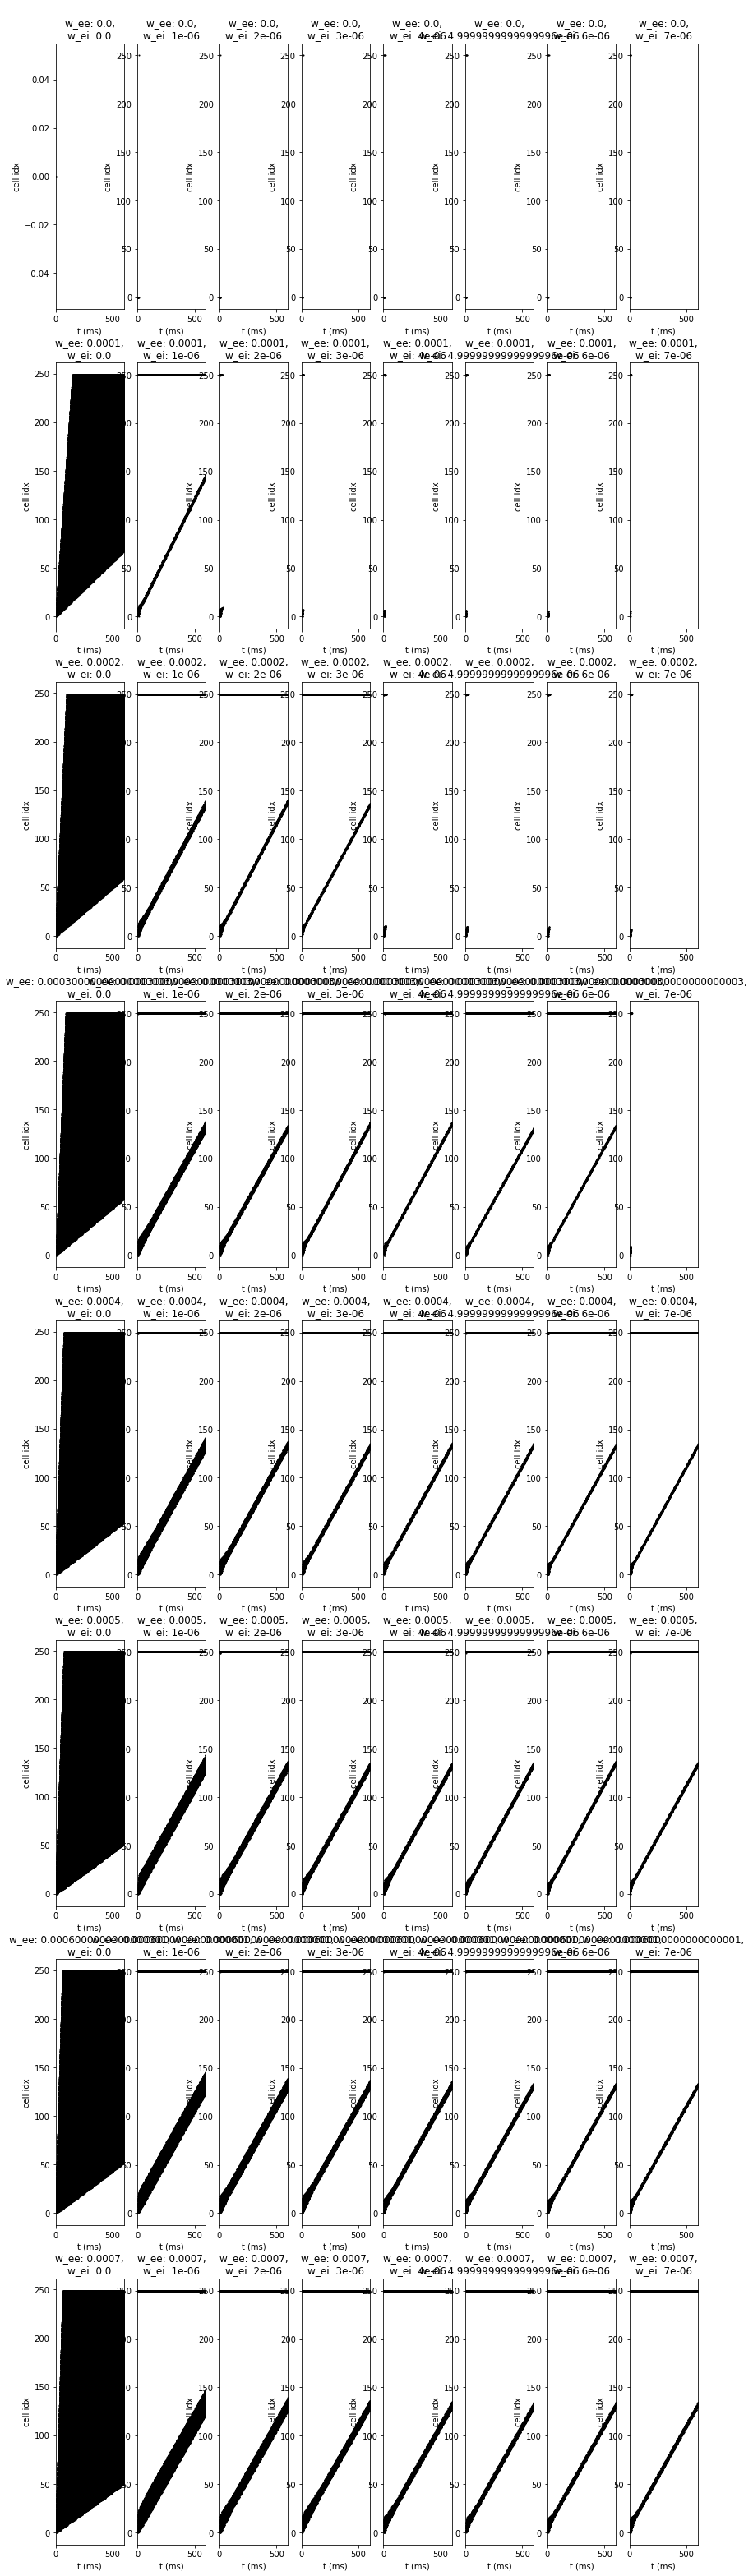

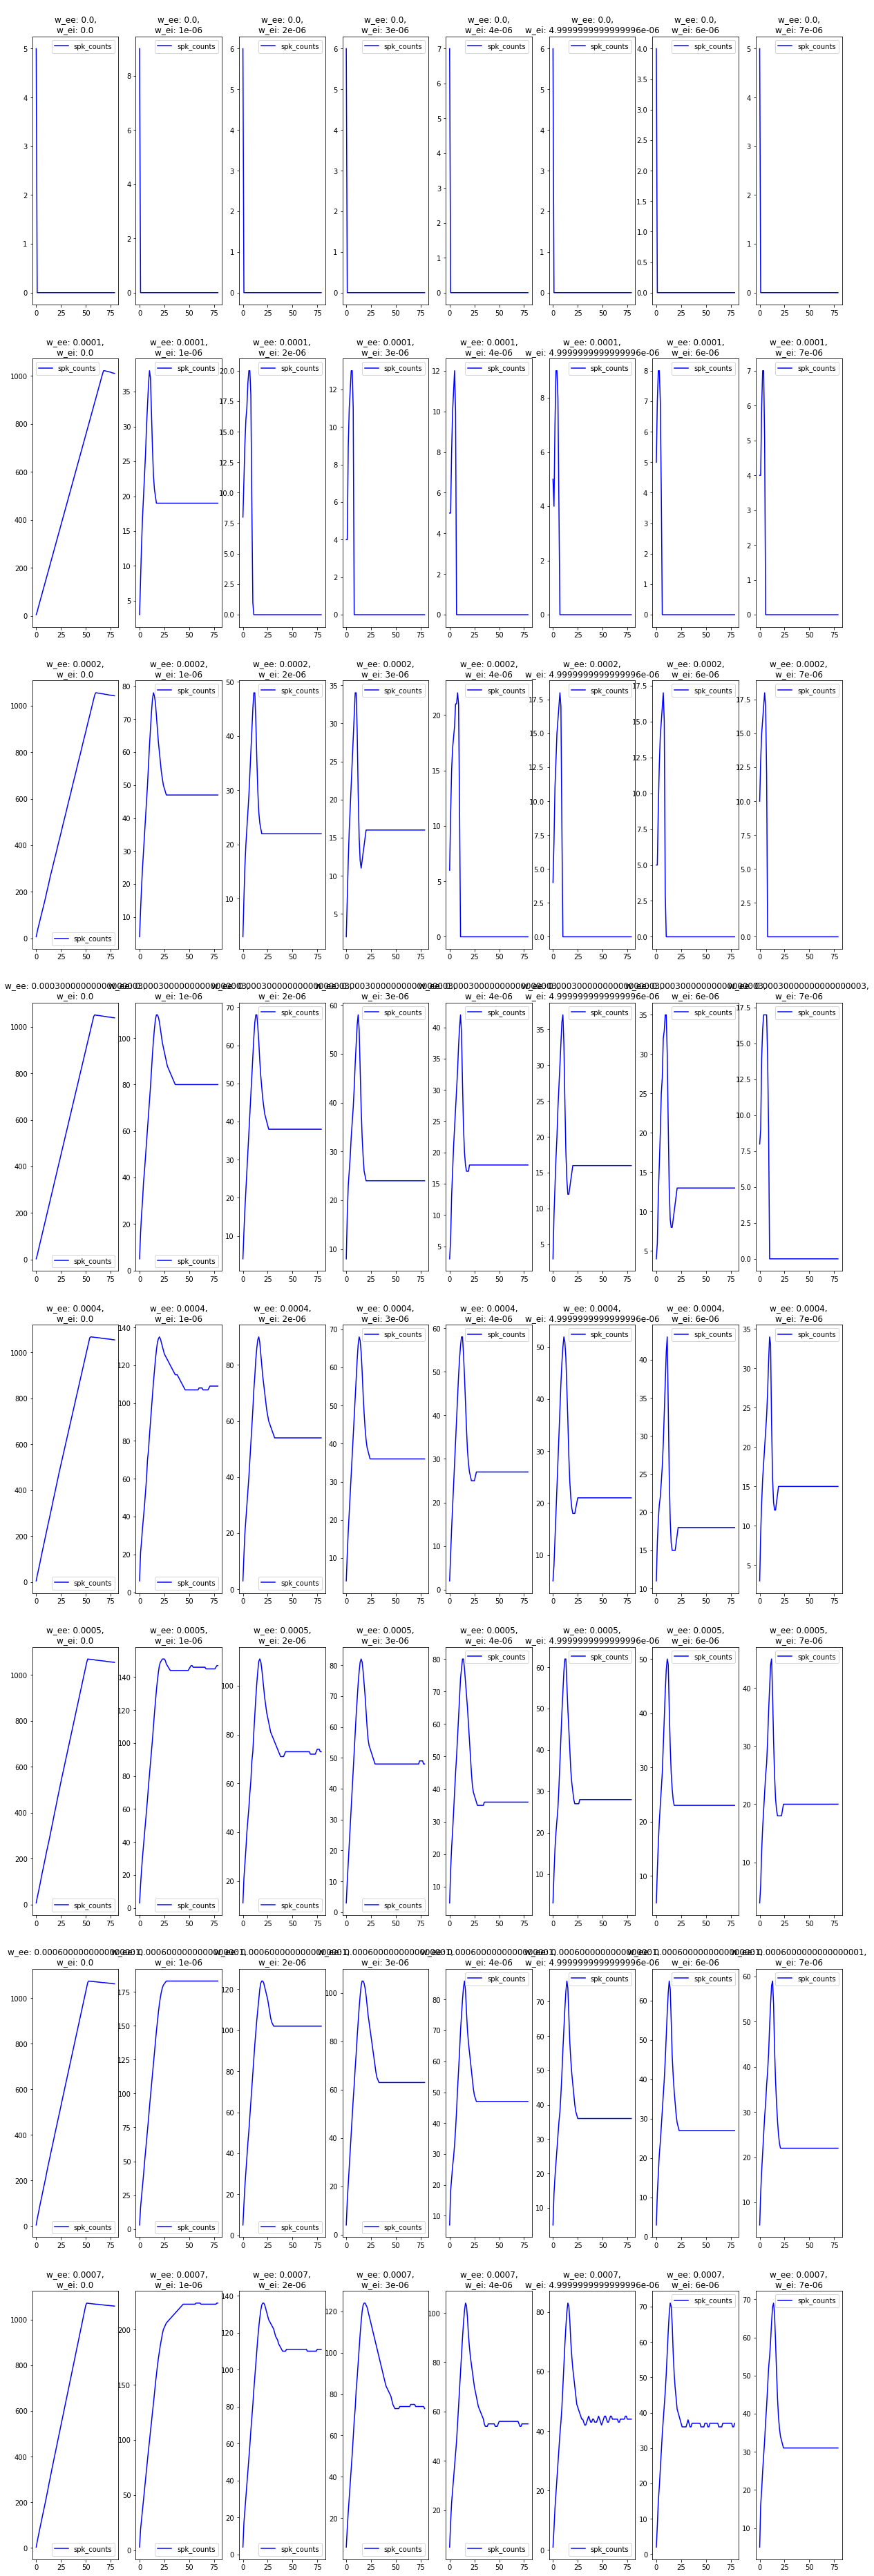

In [11]:
scale = 1.4
n = len(w_ee_vals)
n_2 = len(w_ei_vals)
fig, axs = plt.subplots(n, n_2, sharex=False, sharey=False, figsize=(10 * scale, 5 * n * scale))
colors = ['red', 'black', 'green', 'blue', 'purple', 'brown', 'pink']

fig_3, axs_3 = plt.subplots(n, n_2, sharex=False, sharey=False, figsize=(15 * scale, 6 * n * scale))

stable_spike_nums = []
propagation_speeds = []

for j, (w_ee, w_ei_vals, all_p_for_ei_vals, rasters_for_ei_vals) in enumerate(data):
    stable_spike_nums.append([])
    propagation_speeds.append([])
    for k, rasters in enumerate(rasters_for_ei_vals):
        propagation_speeds_for_condition = []
        stable_spike_nums_for_condition = []
        
        for l, raster in enumerate(rasters):
            if l == 0:
                trial_title = f'\nw_ee: {w_ee},\nw_ei: {w_ei_vals[k]}'
                axs[j, k].scatter(raster[0, :] * 1000, raster[1, :], c='black', s=1)
                axs[j, k].set_title(trial_title)
            spk_counts = []
            z_samples = [n for n in range(80)]
            for z in z_samples:
                n_spikes_for_z = np.sum(raster[1, :] == z)
                spk_counts.append(n_spikes_for_z)
            
            if spk_counts[-1] > 0:
                stable_spike_nums_for_condition.append(np.mean(spk_counts[-10:]))
                propagation_speeds_for_condition.append(all_p_for_ei_vals[k][l])

            if l == 0:
                axs_3[j, k].plot(z_samples[:len(spk_counts)], spk_counts, label='spk_counts', color='blue')
                axs_3[j, k].set_title(trial_title)
                axs_3[j, k].legend()
        stable_spike_nums[-1].append(np.mean(stable_spike_nums_for_condition))
        propagation_speeds[-1].append(np.mean(propagation_speeds_for_condition))

for i in range(0, n):
    for k in range(0, n_2):
        axs[i, k].set_xlabel(r't (ms)')
        axs[i, k].set_ylabel('cell idx')
#         axs[i, k].set_ylim(-0.5, 150)
        axs[i, k].set_xlim(0, 600)


In [42]:
def make_graph(w_ei_vals, w_ee, stable_spike_nums, prop_speeds_for_w_ee, bound=30):
    scale = 2
    fig, axs = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(8 * scale, 4 * scale))
    axs[0].set_xlim(0, bound)
    axs[0].set_ylim(0, bound)
    
    axs[0].set_xlabel('N spikes in')
    axs[0].set_ylabel('N spikes out')
    
    axs[1].set_xlim(0, bound)
#     axs[1].set_ylim(0, 1)
    
    axs[1].set_xlabel('N spikes in')
    axs[1].set_ylabel('Propagation speed')
    
    colors = get_equally_spaced_colors(10, cmap='tab10')
    
    for i, w_ei in enumerate(w_ei_vals):
        if i <= 1:
            continue
        print(w_ee, w_ei, w_ie)
        n_in = np.linspace(1, bound, bound)
        params = {
            'w_ee':   w_ee,
            'w_ei':   w_ei,
            'w_ie':   w_ie,
            'f_e':    f_e,
            'c_e':    c_e,
            'c_i':    c_i,
            'v_th_e': v_th_e,
            'v_th_i': v_th_i,
            'tau_a':  tau_a,
            'tau_m':  tau_m,
        }
        
        n_out, t_star = calc_analytical_preds(n_in, params)

        axs[0].plot(n_in, n_in, '--', lw=0.5, color='black', zorder=-10)
        axs[0].plot(n_in, n_out, lw=0.8, color=colors[i], label=f'w_r: {str(w_ei * w_ie)[:8]}, w_ee: {str(w_ee)[:8]}')
        axs[0].scatter(stable_spike_nums[i], stable_spike_nums[i], color=colors[i], s=50, marker='D')
        
        axs[1].plot(n_in, 1. / t_star, lw=0.8, color=colors[i], label=f'w_r: {str(w_ei * w_ie)[:8]}, w_ee: {str(w_ee)[:8]}')
        axs[1].scatter(stable_spike_nums[i], prop_speeds_for_w_ee[i], color=colors[i], s=50, marker='D')

        
        for i in range(2):
            axs[i].legend()
        

0.0001 2e-06 -3e-05
0.0001 3e-06 -3e-05
0.0001 4e-06 -3e-05
0.0001 4.9999999999999996e-06 -3e-05
0.0001 6e-06 -3e-05
0.0001 7e-06 -3e-05
0.0002 2e-06 -3e-05
0.0002 3e-06 -3e-05
0.0002 4e-06 -3e-05
0.0002 4.9999999999999996e-06 -3e-05
0.0002 6e-06 -3e-05
0.0002 7e-06 -3e-05
0.00030000000000000003 2e-06 -3e-05
0.00030000000000000003 3e-06 -3e-05
0.00030000000000000003 4e-06 -3e-05
0.00030000000000000003 4.9999999999999996e-06 -3e-05
0.00030000000000000003 6e-06 -3e-05
0.00030000000000000003 7e-06 -3e-05
0.0004 2e-06 -3e-05
0.0004 3e-06 -3e-05
0.0004 4e-06 -3e-05
0.0004 4.9999999999999996e-06 -3e-05
0.0004 6e-06 -3e-05
0.0004 7e-06 -3e-05
0.0005 2e-06 -3e-05
0.0005 3e-06 -3e-05
0.0005 4e-06 -3e-05
0.0005 4.9999999999999996e-06 -3e-05
0.0005 6e-06 -3e-05
0.0005 7e-06 -3e-05
0.0006000000000000001 2e-06 -3e-05
0.0006000000000000001 3e-06 -3e-05
0.0006000000000000001 4e-06 -3e-05
0.0006000000000000001 4.9999999999999996e-06 -3e-05
0.0006000000000000001 6e-06 -3e-05
0.0006000000000000001 7e-06

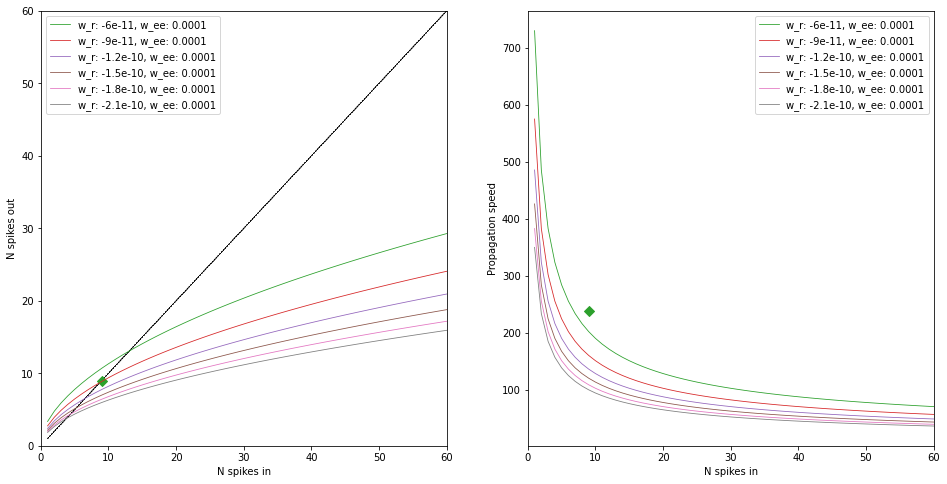

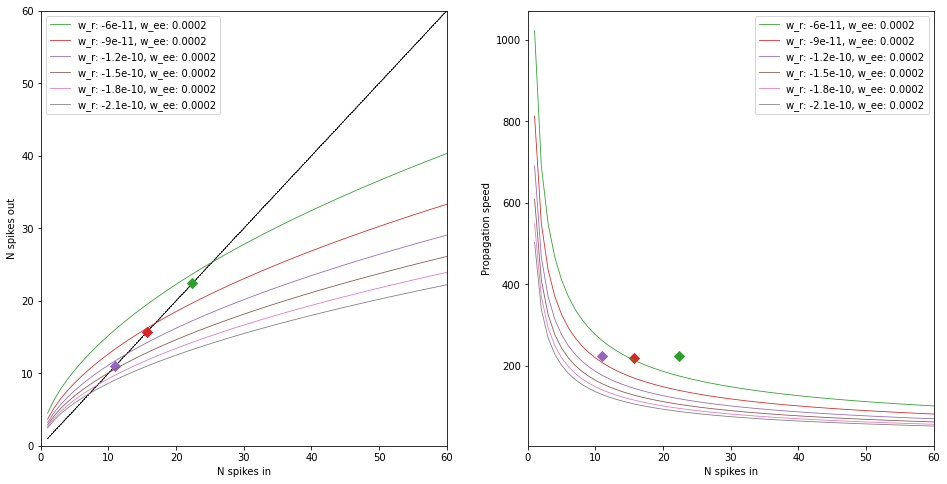

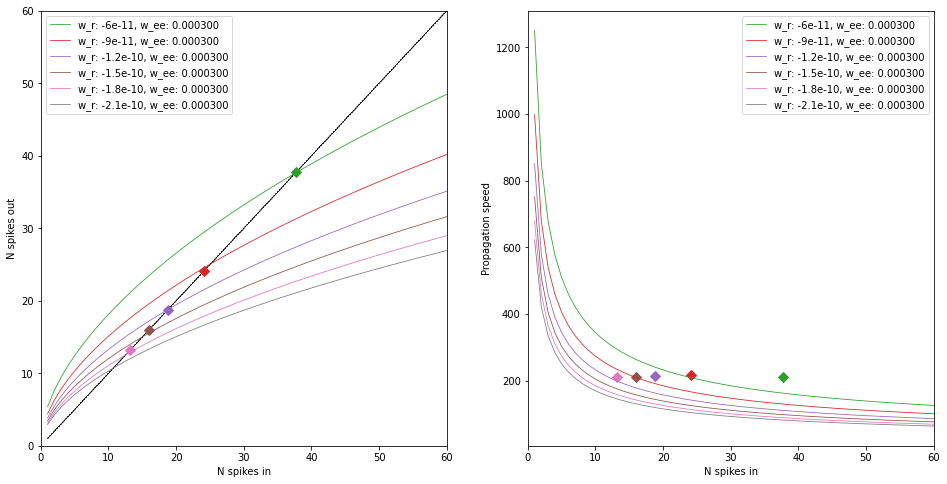

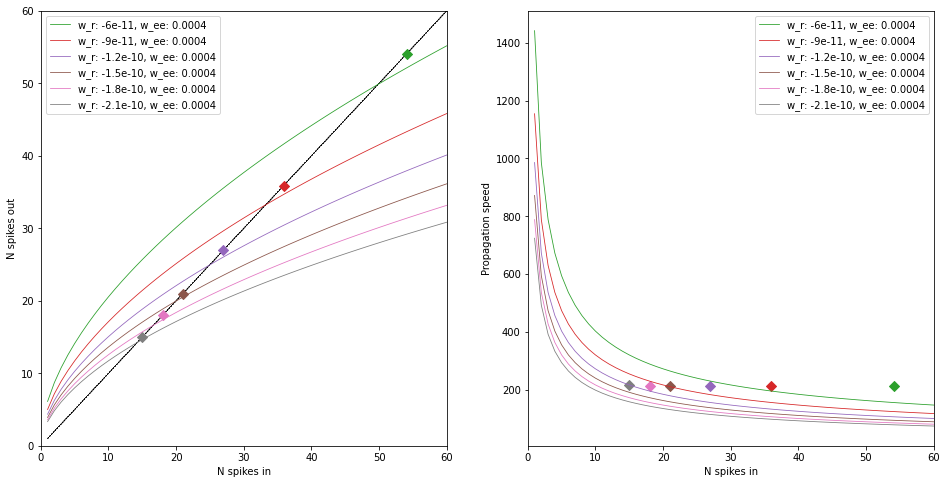

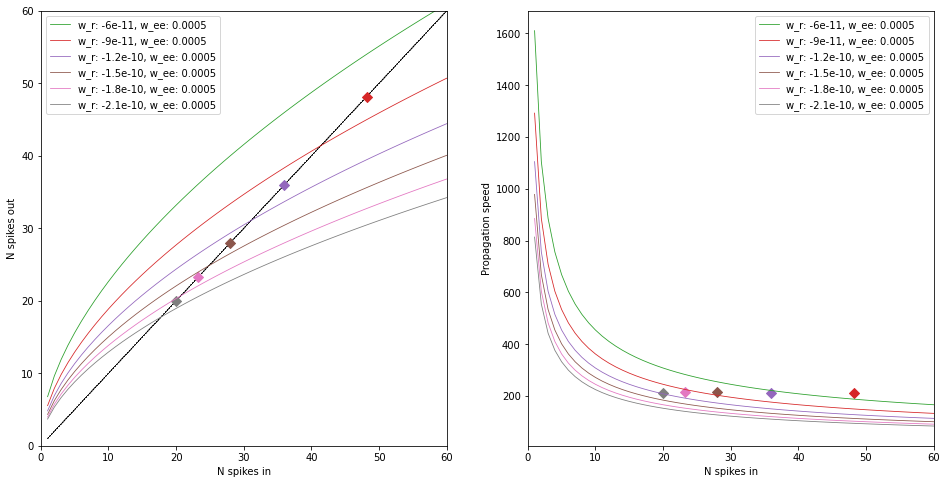

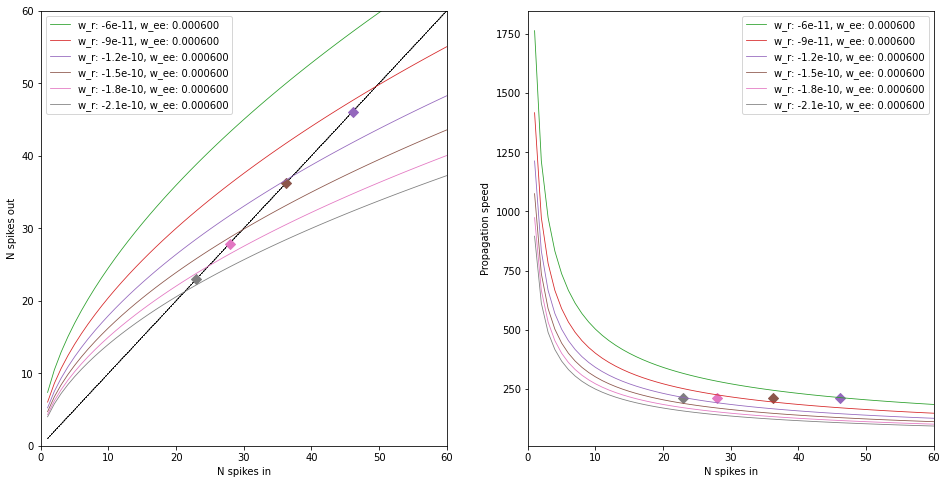

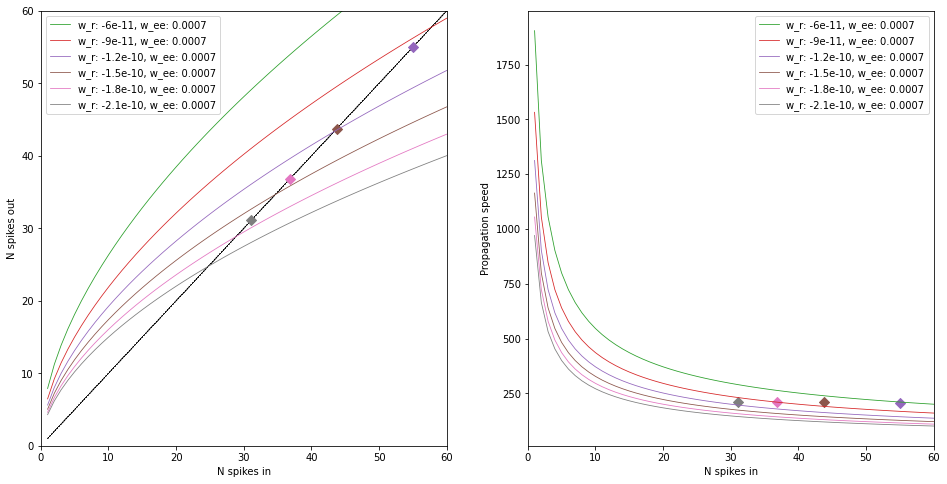

In [43]:
w_ee_vals = np.arange(0, 0.8e-3, 0.1e-3)
w_ei_vals = np.arange(0, 0.8e-5, 0.1e-5)

for i, w_ee in enumerate(w_ee_vals):
    if i == 0:
        continue
    make_graph(w_ei_vals, w_ee, stable_spike_nums[i], propagation_speeds[i], bound=60)